# Logging into github private repo for data.

!ssh-keygen -t rsa -b 4096 -f ~/.ssh/id_rsa -N ''

from google.colab import drive
drive.mount('/content/drive')

!ls

## Data loading

In [1]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
path = '/Users/victoriavu25/BTT_Data/yelp_academic_dataset_business.json'

In [4]:
df = pd.read_json(path, lines=True)

# Data exploration

In [6]:
df = df[df['state'] == 'PA']

In [7]:
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [8]:
df.head(10)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
25,PSo_C1Sfa13JHjzVNW6ziQ,Indian Walk Veterinary Center,662 Durham Rd,Newtown,PA,18940,40.273493,-74.987496,5.0,15,1,None,"Pet Services, Pet Groomers, Pets, Veterinarians","{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
32,8sshLb4UU7emeUDvtJWnpA,DanceLine,30 W Lancaster Ave,Paoli,PA,19301,40.041585,-75.484953,4.5,11,1,"{'BusinessParking': '{'garage': False, 'street...","Dance Wear, Sports Wear, Children's Clothing, ...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-19:0', ..."
33,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,10 Rittenhouse Pl,Ardmore,PA,19003,40.006707,-75.289671,3.5,109,1,"{'RestaurantsGoodForGroups': 'True', 'WiFi': '...","Pizza, Restaurants","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'..."


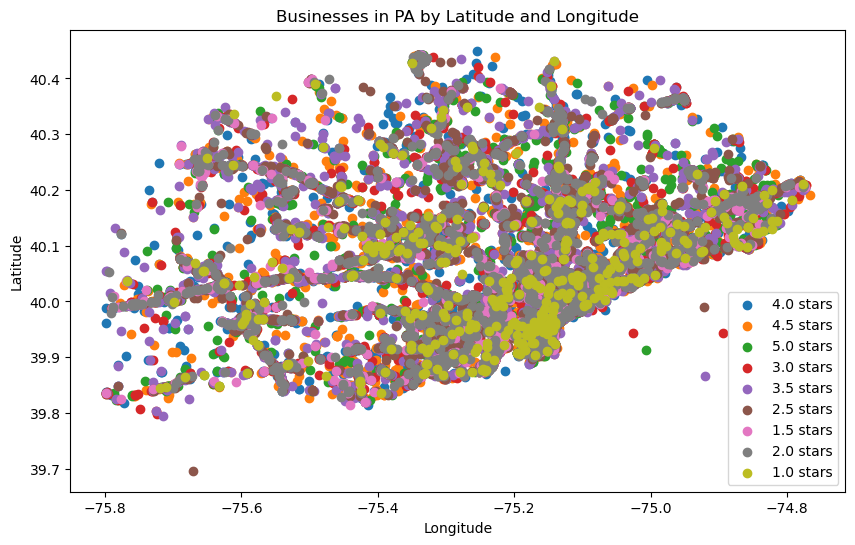

In [9]:
# prompt: plot df by latitude and longitude and cluster by star count

import matplotlib.pyplot as plt

# Assuming 'latitude' and 'longitude' are columns in your DataFrame
plt.figure(figsize=(10, 6))
for stars in df['stars'].unique():
  subset = df[df['stars'] == stars]
  plt.scatter(subset['longitude'], subset['latitude'], label=f'{stars} stars')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Businesses in PA by Latitude and Longitude')
plt.legend()
plt.show()


# Plotting distrubtion of stars


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
stars = df['stars']
stars

3         4.0
4         4.5
15        4.0
19        4.5
25        5.0
         ... 
150325    3.0
150326    3.0
150329    3.0
150334    4.5
150336    4.5
Name: stars, Length: 34039, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


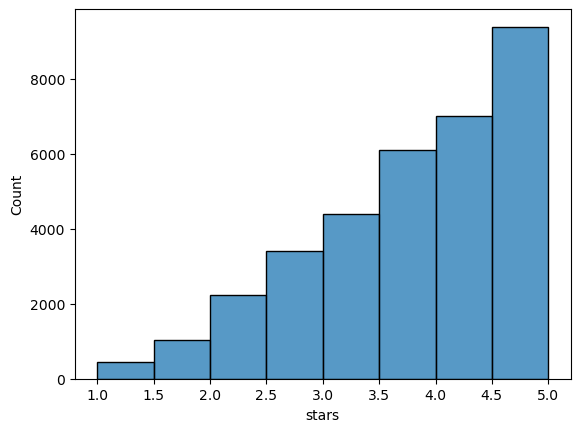

In [12]:
# prompt: show ratings up to 0.5

import matplotlib.pyplot as plt
sns.histplot(stars, binwidth=0.5)
plt.show()


In [13]:
categories = df['categories']
categories

3         Restaurants, Food, Bubble Tea, Coffee & Tea, B...
4                                 Brewpubs, Breweries, Food
15                        Sushi Bars, Restaurants, Japanese
19                                      Korean, Restaurants
25          Pet Services, Pet Groomers, Pets, Veterinarians
                                ...                        
150325    Restaurants, Sandwiches, Convenience Stores, C...
150326               Real Estate, Apartments, Home Services
150329          Day Spas, Beauty & Spas, Skin Care, Massage
150334    Health & Medical, Yoga, Shopping, Naturopathic...
150336                                 Restaurants, Mexican
Name: categories, Length: 34039, dtype: object

In [14]:
# prompt: show most common categories

from collections import Counter

# Assuming 'categories' is a Series where each element is a string of comma-separated categories
all_categories = []
for cat_string in categories.dropna():  # Remove missing values
  all_categories.extend(cat_string.split(', '))

category_counts = Counter(all_categories)
top_categories = category_counts.most_common(50)  # Get top 10

for category, count in top_categories:
  print(f"{category}: {count}")


Restaurants: 12641
Food: 6637
Shopping: 5308
Beauty & Spas: 3399
Home Services: 3032
Health & Medical: 2681
Nightlife: 2588
Local Services: 2531
Bars: 2327
Automotive: 2241
Sandwiches: 2151
Pizza: 2128
Event Planning & Services: 2029
American (Traditional): 1779
Coffee & Tea: 1725
American (New): 1539
Active Life: 1523
Italian: 1433
Breakfast & Brunch: 1425
Hair Salons: 1301
Auto Repair: 1245
Fashion: 1212
Home & Garden: 1175
Nail Salons: 1155
Arts & Entertainment: 1077
Specialty Food: 1028
Burgers: 983
Chinese: 918
Fast Food: 915
Hotels & Travel: 898
Bakeries: 805
Pets: 788
Hair Removal: 779
Doctors: 776
Professional Services: 775
Seafood: 767
Fitness & Instruction: 761
Grocery: 750
Desserts: 720
Caterers: 714
Mexican: 714
Delis: 708
Salad: 678
Real Estate: 660
Cafes: 653
Ice Cream & Frozen Yogurt: 613
Dentists: 606
Contractors: 582
Venues & Event Spaces: 570
Waxing: 566


In [15]:
# prompt: take out all of the items in each categories with pandas

all_categories = []
for index in df.index:
  temp = df.categories[index]
  if type(temp) == str:
    temp = temp.split(';')
    all_categories.extend(temp)
all_categories = set(all_categories)



In [16]:
len(all_categories)

21829

In [17]:

all_categories

{'Restaurants, Seafood, Breakfast & Brunch, Mexican, Event Planning & Services, Custom Cakes, Caterers, Party & Event Planning, Food',
 'Trainers, Boot Camps, Weight Loss Centers, Fitness & Instruction, Health & Medical, Active Life, Beauty & Spas',
 'Shopping, Countertop Installation, Contractors, Tiling, Flooring, Home & Garden, Kitchen & Bath, Building Supplies, Home Services',
 'Ice Cream & Frozen Yogurt, Event Planning & Services, Restaurants, Desserts, Vegan, Caterers, Food',
 'Sandwiches, Pizza, Fast Food, Italian, Restaurants',
 'Active Life, Recreation Centers, Parks',
 'Public Services & Government, Departments of Motor Vehicles',
 'Heating & Air Conditioning/HVAC, Home Services, Local Services, Air Duct Cleaning, Water Heater Installation/Repair',
 'Local Services, Laundry Services, Dry Cleaning & Laundry, Shoe Repair, Sewing & Alterations',
 'American (New), Live/Raw Food, Restaurants',
 'Sewing & Alterations, Laundry Services, Shoe Repair, Dry Cleaning & Laundry, Local Ser

In [18]:
# prompt: filter the data frame to only include resturants and food related shops and save it to a new data frame

import pandas as pd
# Create a list of relevant categories
food_categories = ['Restaurants', 'Food', 'Coffee & Tea', 'Fast Food', 'Sandwiches', 'Pizza', 'Burgers',
                   'American (Traditional)', 'Mexican', 'Chinese', 'Italian', 'Breakfast & Brunch',
                   'Cafes', 'Seafood', 'Sushi Bars', 'Barbeque', 'Indian', 'Thai', 'Greek']

# Filter the DataFrame
df_food = df[df['categories'].apply(lambda x: any(cat in str(x) for cat in food_categories) if pd.notna(x) else False)]


In [19]:
df_food.shape

(15480, 14)

In [20]:
df.shape

(34039, 14)

In [21]:
df_food.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
31,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."
33,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,10 Rittenhouse Pl,Ardmore,PA,19003,40.006707,-75.289671,3.5,109,1,"{'RestaurantsGoodForGroups': 'True', 'WiFi': '...","Pizza, Restaurants","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
35,aPNXGTDkf-4bjhyMBQxqpQ,Craft Hall,901 N Delaware Ave,Philadelphia,PA,19123,39.962582,-75.135657,3.5,65,1,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Eatertainment, Arts & Entertainment, Brewpubs,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-22:0'..."
36,2xVsWBNFwZOxIOdd9Mwnww,Cheeseburger In Paradise,116 N Pottstown Pike,Exton,PA,19341,40.029962,-75.630607,2.5,20,0,"{'NoiseLevel': 'u'average'', 'HasTV': 'True', ...","Restaurants, Burgers",None
49,ABxoFuzZy5mqQ8C5FJJajQ,Core de Roma,201 Jefferson St,Bala Cynwyd,PA,19004,40.028357,-75.238084,5.0,12,1,"{'RestaurantsTakeOut': 'None', 'RestaurantsDel...","Restaurants, Italian","{'Tuesday': '15:0-20:30', 'Wednesday': '15:0-2..."


In [22]:
# prompt: attributes is a dict in df, write a function to show me all the unique attribute keys

def get_unique_attribute_keys(df):
  """
  Extracts all unique attribute keys from a DataFrame with a 'attributes' column containing dictionaries.

  Args:
    df: Pandas DataFrame with an 'attributes' column.

  Returns:
    A set of unique attribute keys.
  """
  all_keys = set()
  for attributes in df['attributes'].dropna():
    if isinstance(attributes, dict):
      all_keys.update(attributes.keys())
  return all_keys

# Get the unique attribute keys
unique_keys = get_unique_attribute_keys(df)
unique_keys


{'AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HairSpecializesIn',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi'}

In [23]:
# for filtering
resturant_attirbutes = ['Caters', 'DriveThru', 'DietaryRestrictions',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut'
]

In [24]:
len(get_unique_attribute_keys(df_food))

38

In [25]:
len(get_unique_attribute_keys(df))

39

In [26]:
# prompt: check if any item in df has no attirbutes show me which ones

# Find rows with missing attributes
missing_attributes = df[df['attributes'].isnull()]

# Display the indices of rows with missing attributes
print(missing_attributes.index)


Index([    25,    158,    210,    223,    230,    239,    251,    288,    301,
          335,
       ...
       149710, 149772, 149814, 149883, 149890, 149893, 149991, 150045, 150070,
       150295],
      dtype='int64', length=2958)


In [27]:
missing_attributes

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
25,PSo_C1Sfa13JHjzVNW6ziQ,Indian Walk Veterinary Center,662 Durham Rd,Newtown,PA,18940,40.273493,-74.987496,5.0,15,1,None,"Pet Services, Pet Groomers, Pets, Veterinarians","{'Monday': '8:0-19:0', 'Tuesday': '8:0-19:0', ..."
158,FC6ef4rMMZKNov_-A9M6iQ,TD Bank Havertown,120 W Eagle Rd,Haverford,PA,19083,39.985661,-75.314844,1.5,6,1,None,"Banks & Credit Unions, Financial Services",None
210,UoKkgWmE9-c3wbWwO4VAVQ,Beaver Hill Condominium,309 Florence Ave,Jenkintown,PA,19046,40.094306,-75.135247,3.0,5,1,None,"Real Estate, Apartments, Home Services",None
223,QU-X2Pijwd4SitfYXoZWMQ,Mason's Tree Service,,West Chester,PA,19380,39.960664,-75.605488,3.0,9,1,None,"Home Services, Tree Services","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ..."
230,do6EpBc7ZUoaqdzuUuGFXA,Jim's Auto Detailing,729 W Lancaster Ave,Wayne,PA,19087,40.047520,-75.409145,4.5,8,1,None,"Automotive, Auto Detailing, Car Wash, Auto Gla...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149893,hzX8Zrsxge4PXXKs_XAeqA,Can Tho City,3600 Spruce St,Philadelphia,PA,19104,39.950506,-75.195192,4.0,10,1,None,"Vietnamese, Restaurants, Breakfast & Brunch, S...",None
149991,GsLg3ZOgxxYoMMK9vlDtzA,The Living Room,701 South 5th St,Philadelphia,PA,19147,39.940289,-75.150878,4.0,9,0,None,"Asian Fusion, Restaurants",None
150045,cU-X7l15e-yI2YCsfCGaJQ,Success Auto Tags,151 N 9th St,Philadelphia,PA,19107,39.954901,-75.154242,4.0,8,1,None,"Auto Parts & Supplies, Education, Public Servi...",None
150070,kSDPRHiqXnuG4wvBvmUHFQ,New Hope Body Care,19A W Bridge St,New Hope,PA,18938,40.364173,-74.952363,5.0,7,1,None,"Shopping, Massage, Vitamins & Supplements, Ref...","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."


## Looking at this we can assume that we can use the restaurant attributes and restaurant tags to filter out which store is a restaurant, it might be a rough estimate but we can do more intense filtering later


In [28]:
# prompt: make a dataframe called df_attributes that has all the items that has any of the attributes listed in resturant_attirbutes

# Filter the DataFrame based on the presence of any of the restaurant attributes
df_attributes = df_food[df_food['attributes'].apply(lambda x: any(key in x for key in resturant_attirbutes) if isinstance(x, dict) else False)]


In [29]:
unique_keys1 = get_unique_attribute_keys(df_attributes)
unique_keys1

{'AcceptsInsurance',
 'AgesAllowed',
 'Alcohol',
 'Ambience',
 'BYOB',
 'BYOBCorkage',
 'BestNights',
 'BikeParking',
 'BusinessAcceptsBitcoin',
 'BusinessAcceptsCreditCards',
 'BusinessParking',
 'ByAppointmentOnly',
 'Caters',
 'CoatCheck',
 'Corkage',
 'DietaryRestrictions',
 'DogsAllowed',
 'DriveThru',
 'GoodForDancing',
 'GoodForKids',
 'GoodForMeal',
 'HappyHour',
 'HasTV',
 'Music',
 'NoiseLevel',
 'Open24Hours',
 'OutdoorSeating',
 'RestaurantsAttire',
 'RestaurantsCounterService',
 'RestaurantsDelivery',
 'RestaurantsGoodForGroups',
 'RestaurantsPriceRange2',
 'RestaurantsReservations',
 'RestaurantsTableService',
 'RestaurantsTakeOut',
 'Smoking',
 'WheelchairAccessible',
 'WiFi'}

In [30]:
df_attributes.shape

(15012, 14)

In [31]:
df_food.shape

(15480, 14)

In [32]:

df_attributes.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
28,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."


In [33]:
# prompt: show the first restaurant's entire attribute column

# restaurantsDelivery, outdoorseating, businessacceptscreditcards, bikeparking, restauranttakeout, byappointmentonly, caters TRUE OR FALSE
# businessparking, restaurantpricerange2, wifi, alcohol HARDER

print(df_attributes['attributes'].iloc[0])
print(df_attributes['attributes'].iloc[1])


{'RestaurantsDelivery': 'False', 'OutdoorSeating': 'False', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}", 'BikeParking': 'True', 'RestaurantsPriceRange2': '1', 'RestaurantsTakeOut': 'True', 'ByAppointmentOnly': 'False', 'WiFi': "u'free'", 'Alcohol': "u'none'", 'Caters': 'True'}
{'BusinessAcceptsCreditCards': 'True', 'WheelchairAccessible': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': "{'garage': None, 'street': None, 'validated': None, 'lot': True, 'valet': False}", 'BikeParking': 'True', 'GoodForKids': 'True', 'Caters': 'False'}


In [34]:
# prompt: combine both df_food and df_attributes and drop all duplicate business_id

import pandas as pd
combined_df = pd.concat([df_food, df_attributes]).drop_duplicates(subset=['business_id'])
print(combined_df.shape)


(15480, 14)


In [35]:
# prompt: save combined_df into json with spacing

combined_df.to_json('combined_df.json', orient='records', indent=2)
